In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import our custom modules
import sys
import os
sys.path.append('/content/drive/MyDrive/Fake News Detection/src')
sys.path.append('/content/drive/MyDrive/Fake News Detection/model')

from preprocess_data import FakeNewsPreprocessor
from get_model import get_model, get_model_info, compare_models

print("Libraries imported successfully!")


Libraries imported successfully!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the data
fake_path = "/content/drive/MyDrive/Fake News Detection/data/fake.csv"
true_path = "/content/drive/MyDrive/Fake News Detection/data/true.csv"

preprocessor = FakeNewsPreprocessor()
df = preprocessor.load_data(fake_path, true_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Loading datasets...
Fake news samples: 23481
True news samples: 21417
Total samples: 44898
Dataset shape: (44898, 5)
Columns: ['title', 'text', 'subject', 'date', 'label']


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
print(df.info())

print("\nFirst few rows:")
print("=" * 50)
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

First few rows:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
# Check for missing values
print("Missing values:")
print("=" * 30)
print(df.isnull().sum())

# Check label distribution
print("\nLabel distribution:")
print("=" * 30)
print(df['label'].value_counts())
print(f"\nFake news: {df['label'].value_counts()[0]} ({df['label'].value_counts()[0]/len(df)*100:.1f}%)")
print(f"True news: {df['label'].value_counts()[1]} ({df['label'].value_counts()[1]/len(df)*100:.1f}%)")


Missing values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Label distribution:
label
0    23481
1    21417
Name: count, dtype: int64

Fake news: 23481 (52.3%)
True news: 21417 (47.7%)


In [6]:
# Preprocess the data and train models
print("Starting data preprocessing...")
df_processed = preprocessor.preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = preprocessor.split_data(df_processed)

# Vectorize text for traditional ML models
X_train_tfidf, X_test_tfidf = preprocessor.vectorize_text(X_train, X_test)

print(f"Training set: {X_train_tfidf.shape}")
print(f"Test set: {X_test_tfidf.shape}")


Starting data preprocessing...
Starting data preprocessing...
Handling missing values...
Removing duplicates...
Cleaning text data...
Final dataset shape: (44680, 8)
Label distribution:
label
0    23469
1    21211
Name: count, dtype: int64
Splitting data into train/test sets...
Train set: 35744 samples
Test set: 8936 samples
Vectorizing text data...
TF-IDF matrix shape - Train: (35744, 5000), Test: (8936, 5000)
Training set: (35744, 5000)
Test set: (8936, 5000)


In [ ]:
# Train and compare multiple models
models_to_test = ['logistic','svm']
results = {}

for model_type in models_to_test:
    print(f"\nTraining {model_type} model...")
    print("-" * 40)

    # Create and train model
    model = get_model(model_type)
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    from sklearn.metrics import accuracy_score, classification_report
    accuracy = accuracy_score(y_test, y_pred)

    results[model_type] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))



Training logistic model...
----------------------------------------
Accuracy: 0.9917
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4694
        True       0.99      0.99      0.99      4242

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


Training svm model...
----------------------------------------


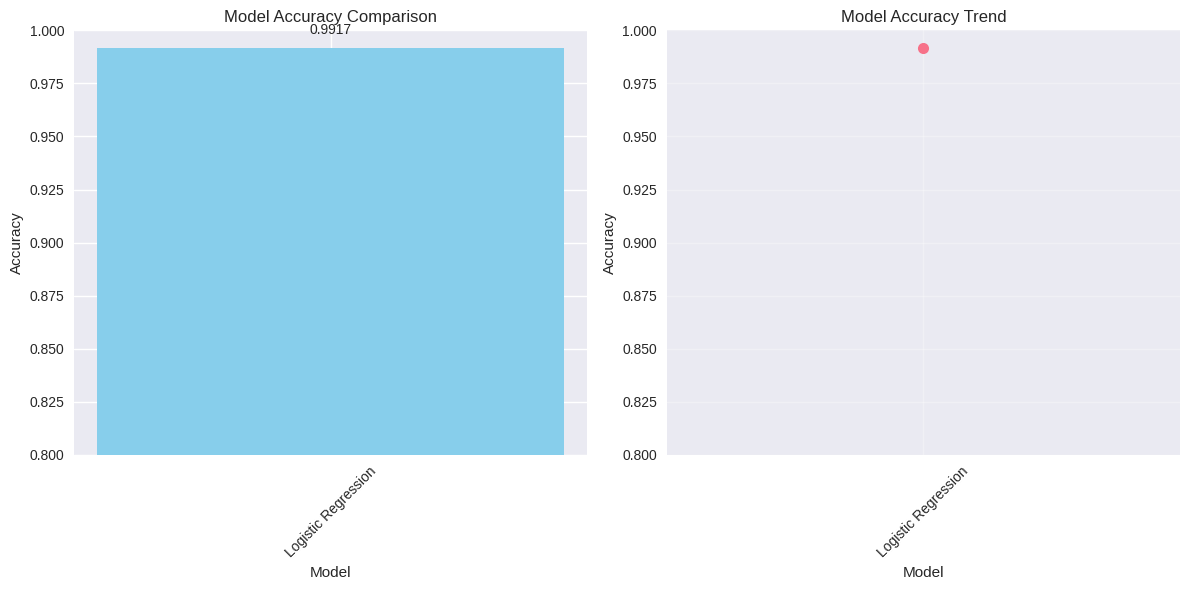


Best Model: Logistic Regression with accuracy: 0.9917


In [8]:
# Compare model accuracies
accuracies = [results[model]['accuracy'] for model in models_to_test]
model_names = [get_model_info(model)['name'] for model in models_to_test]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.plot(model_names, accuracies, marker='o', linewidth=2, markersize=8)
plt.title('Model Accuracy Trend')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_type = models_to_test[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest Model: {get_model_info(best_model_type)['name']} with accuracy: {best_accuracy:.4f}")
